In [26]:
%load_ext autoreload
%autoreload 2
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set(style="white")
#sns.set(font="monospace")

pd.options.display.width = 1000
pd.options.display.max_colwidth = 150
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:76% !important; }</style>"))

from ebi_summarize_data import *
from preprocess import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metadata based

In [27]:
md_fp = "/D/ebi/DEFAULT_METADATA.tsv"
huge_matrix_with_all_runs_fp = "/D/ebi/OTU-TSV_v2.tsv"

In [28]:
md = pd.read_csv(md_fp, sep='\t', index_col=0)

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
prj, sam = ebi_website_info()

b'Skipping line 32: expected 12 fields, saw 13\nSkipping line 191: expected 12 fields, saw 14\nSkipping line 305: expected 12 fields, saw 13\nSkipping line 396: expected 12 fields, saw 15\nSkipping line 476: expected 12 fields, saw 19\nSkipping line 514: expected 12 fields, saw 19\n'
b'Skipping line 27369: expected 5 fields, saw 6\n'


In [58]:
sam_per_prj, biome_freq, tax_freq, tax_freq_by_biome = ebi_summarize_data_main(md_fp, huge_matrix_with_all_runs_fp, prj, sam)

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


--- There are 41 new projects since last download.
Index(['run ID', 'OTU ID', 'counts', 'taxonomy'], dtype='object')


In [59]:
print("On EBI website:\nNumber of projects: ", len(prj), "\nNumber of samples: ", len(sam))

On EBI website:
Number of projects:  781 
Number of samples:  49754


# Distribution of counts

In [4]:
Ai = pd.read_csv('/D/ebi/A_OTU-TSV_v2_Fecal.tsv', sep="\t", index_col=0)
A_fulli = pd.read_csv('/D/ebi/A_OTU-TSV_v2.tsv', sep="\t", index_col = 0)

In [5]:
#A = log_transform_counts(Ai)
A = correspondence_analysis_transform(Ai)

May not be correctly implemented


In [6]:
#A_full = log_transform_counts(A_fulli)
A_full = correspondence_analysis_transform(A_fulli)

May not be correctly implemented


Over samples; raw
17953253361.4


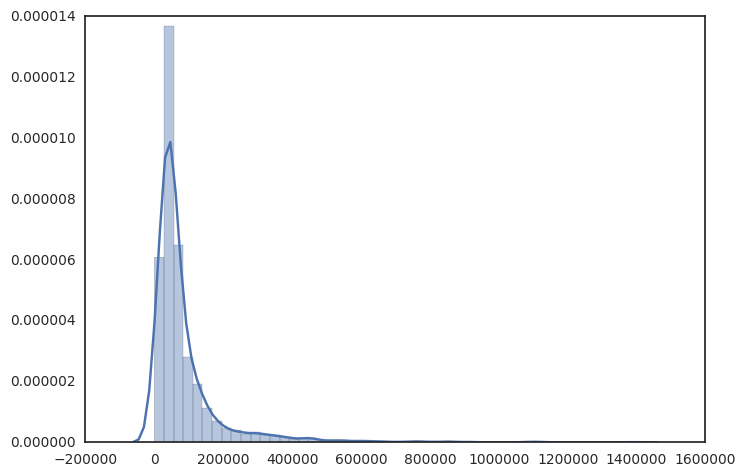

In [7]:
print("Over samples; raw")
print(A_full.sum(0).max())
p1 = sns.distplot(Ai.sum(1))

Over samples; transformed
112592844.0


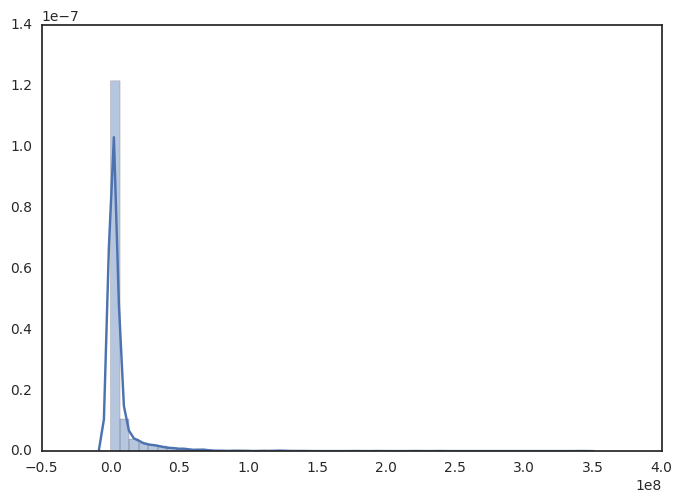

In [8]:
print("Over samples; transformed")
print(A_fulli.sum(0).max())
p2 = sns.distplot(A.sum(1)) #.set_xlim(0,0.2)

Over samples; transformed


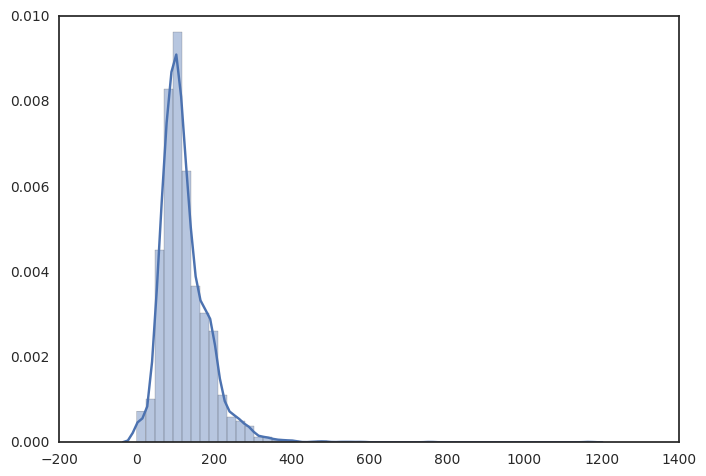

In [9]:
print("Over samples; transformed")
p2 = sns.distplot(log_transform_counts(Ai,10).sum(1)).set_ylim(0,)

Over samples; transformed


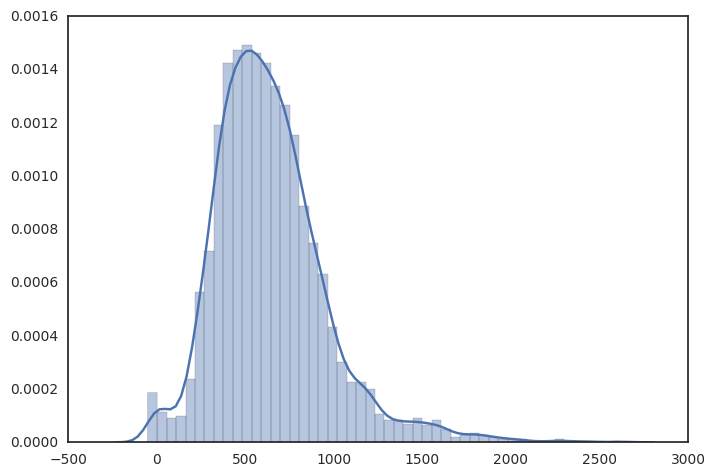

In [20]:
print("Over samples; transformed")
p2 = sns.distplot(log_transform_counts(A,2).sum(1)).set_ylim(0,)
#corr analysis transform AND log looks pretty... Normal. But do I actually want this?
# also, why is y axis fractions?...

In [24]:
print("Over counts; raw. Percentage of zeros")
x1 = []
for c in Ai:
    x1 += Ai[c].tolist()

x1.count(0)/len(x1)
#p2 = sns.distplot(x1).set_xlim(0,1000)


Over counts; raw. Percentage of zeros


0.9605363683935112

In [12]:
A.shape

(4116, 2600)

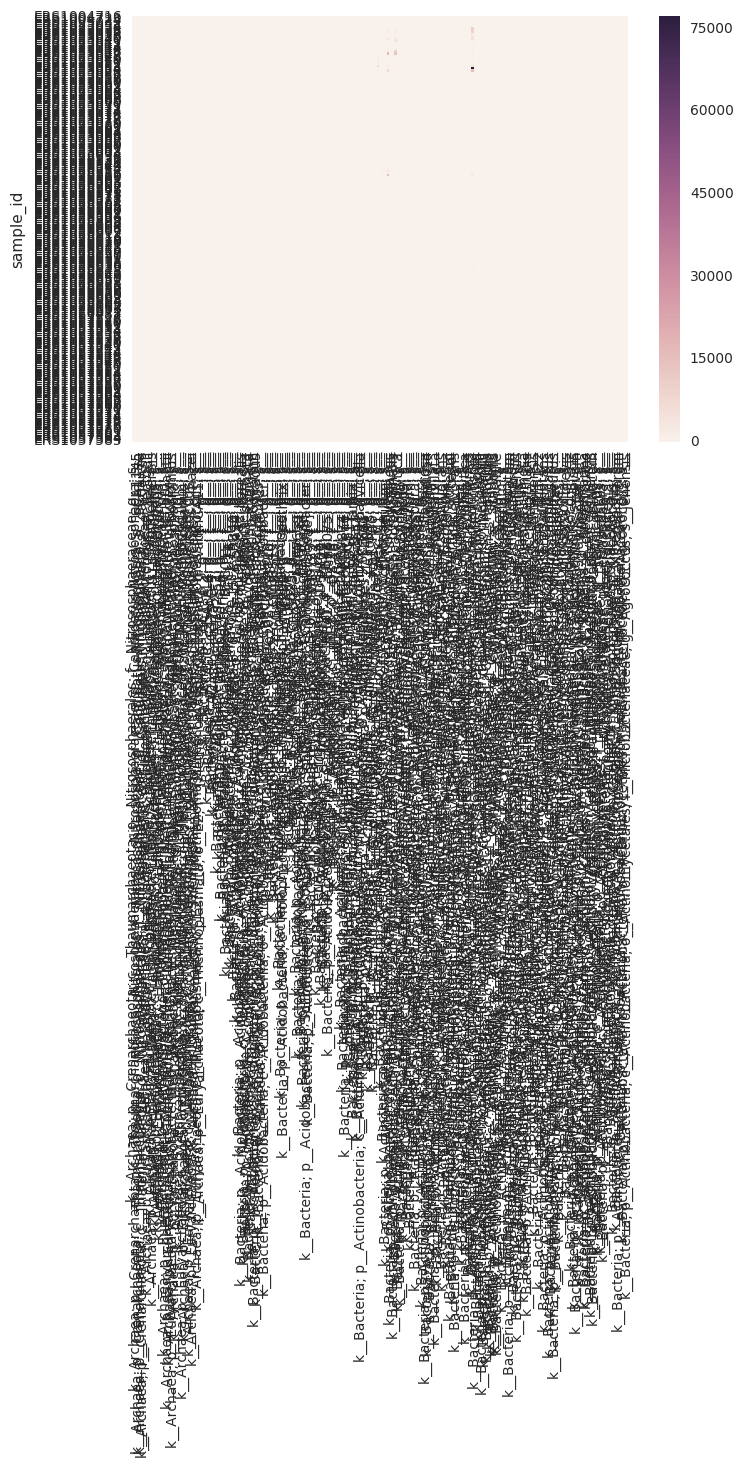

In [14]:
sns.heatmap(A.ix[:200, :200])

This looks really sparse. Maybe I should use MI on a binarized data (present / not present)...

In [60]:
#pd.DataFrame(sam_per_prj[:30])
pd.DataFrame(sam_per_prj.describe())

,project_id
count,739.000000
mean,58.749662
std,336.445018
min,1.000000
25%,1.000000
50%,6.000000
75%,28.500000
max,8037.000000


In [61]:
print("Sample counts per biome")
pd.DataFrame(biome_freq.head(30))

Sample counts per biome


,biome
Fecal,9173
Human,8800
Soil,6340
Digestive system,2603
Vagina,2521
Skin,2038
Large intestine,1929
Plants,1362
Agricultural,799
Activated Sludge,673


In [62]:
print("OTU counts - run based, TODO: collapse by samples")
tax_freq.head(30)

OTU counts - run based, TODO: collapse by samples


,counts
taxonomy,
k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacteriales; f__Enterobacteriaceae; g__; s__,115314592.0
k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__,94025398.0
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Faecalibacterium; s__prausnitzii,46613551.0
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__; s__,42190906.0
k__Archaea; p__Euryarchaeota; c__Methanococci; o__Methanococcales; f__Methanocaldococcaceae; g__Methanocaldococcus; s__,40668659.0
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__,39136381.0
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__,39103207.0
k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Streptococcus; s__,36669023.0
k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__copri,33060079.0


In [113]:
#tf = tax_freq_by_biome.reset_index().groupby('biome').apply(lambda x: x[:1000000000])[['taxonomy', 'counts']]

tf = tax_freq_by_biome.reset_index()
tf.index = tf[['taxonomy']]
tf = tf.groupby('biome').apply(lambda x: x[:1000000000]).drop(['biome', 'taxonomy'], axis=1)
tf

Index(['biome', 'taxonomy', 'counts'], dtype='object')


counts
biome                                                                                                                                                               
Abyssal plane (k__Bacteria; p__Actinobacteria; c__Acidimicrobiia; o__Acidimicrobiales; f__OCS155; g__; s__,)                                               1616660.0
              (k__Bacteria; p__Bacteroidetes; c__Flavobacteriia; o__Flavobacteriales; f__Flavobacteriaceae; g__; s__,)                                     1511463.0
              (k__Bacteria; p__Cyanobacteria; c__Synechococcophycideae; o__Synechococcales; f__Synechococcaceae; g__Prochlorococcus; s__,)                 1466851.0
              (k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Oceanospirillales; f__Halomonadaceae; g__Candidatus Portiera; s__,)              1349717.0
              (k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__Pelagibacteraceae; g__; s__,)                                  1289768.0
              (k__Archaea; p__Euryarchaeota; c__Thermoplasmata; o__E2; f__Marine group II; g__; s__,)                                                      1063961.0
              (k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Stramenopiles; f__; g__; s__,)                                                             616894.0
              (k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhodobacterales; f__Rhodobacteraceae; g__; s__,)                                  518739.0
              (k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Haptophyceae; f__; g__; s__,)                                                              474797.0
              (k__Bacteria; p__Bacteroidetes; c__Flavobacteriia; o__Flavobacteriales; f__NS9; g__; s__,)                                                    458073.0
              (k__Bacteria; p__Bacteroidetes; c__Flavobacteriia; o__Flavobacteriales; f__Flavobacteriaceae; g__Flavobacterium; s__,)                        439838.0
              (k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__; f__; g__; s__,)                                                                 426108.0
              (k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Thiotrichales; f__Piscirickettsiaceae; g__; s__,)                                 388879.0
              (k__Bacteria; p__SAR406; c__AB16; o__Arctic96B-7; f__A714017; g__ZA3312c; s__,)                                                               292163.0
              (k__Bacteria; p__Cyanobacteria; c__Synechococcophycideae; o__Synechococcales; f__Synechococcaceae; g__Synechococcus; s__,)                    265366.0
              (k__Bacteria; p__Chloroflexi; c__SAR202; o__; f__; g__; s__,)                                                                                 259557.0
              (k__Bacteria; p__Bacteroidetes; c__Flavobacteriia; o__Flavobacteriales; f__; g__; s__,)                                                       252833.0
              (k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Nocardiaceae; g__Rhodococcus; s__fascians,)                        231141.0
              (k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Oceanospirillales; f__Alcanivoracaceae; g__Alcanivorax; s__,)                     231116.0
              (k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Moraxellaceae; g__; s__,)                                     223922.0
              (k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Oceanospirillales; f__SUP05; g__; s__,)                                           200423.0
              (k__Bacteria; p__SAR406; c__AB16; o__Arctic96B-7; f__A714017; g__SGSH944; s__,)                                                               195404.0
              (k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__; g__; s__,)                                                    185002.0
              (k__Bacteria; p__Ba

Biome summaries: Fecal


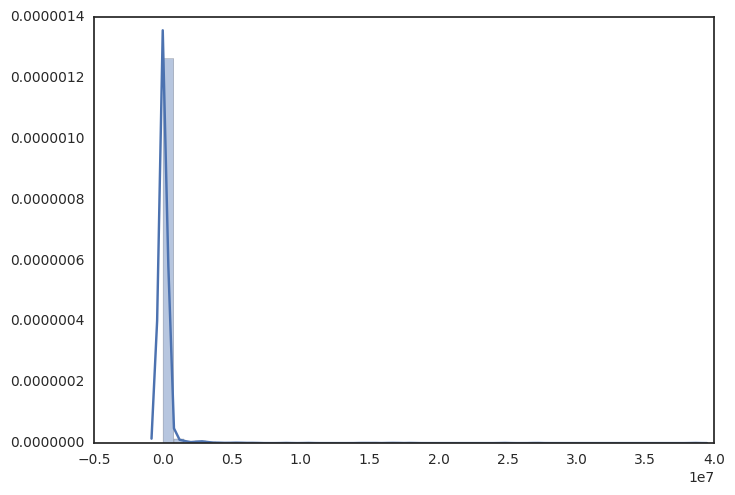

In [114]:
print('Biome summaries: Fecal')
tf_fecal = tf.xs('Fecal', level = "biome")
p1 = sns.distplot(tf_fecal[['counts']])

In [115]:
print("Most common taxons in Fecal")
tf_fecal[:20]

Most common taxons in Fecal


,counts
"(k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__,)",38635941.0
"(k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Faecalibacterium; s__prausnitzii,)",27083629.0
"(k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__copri,)",24798159.0
"(k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacteriales; f__Enterobacteriaceae; g__; s__,)",17994338.0
"(k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__,)",16971224.0
"(k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__,)",16435669.0
"(k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__; s__,)",15301066.0
"(k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Streptococcus; s__,)",14449615.0
"(k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium; s__longum,)",10542501.0
"(k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Bifidobacteriales; f__Bifidobacteriaceae; g__Bifidobacterium; s__,)",8946328.0


In [ ]:
# just a heatmap of raw counts

# OTU vs taxonomy
In 16S metagenomics approaches, OTUs are cluster of similar sequence variants of the 16S rDNA marker gene sequence. Each of these cluster is intended to represent a taxonomic unit of a bacteria species or genus depending on the sequence similarity threshold. (http://www.metagenomics.wiki/pdf/definition/operational-taxonomic-unit-otu)

(i) some species have genes that are >97% similar, giving merged OTUs containing multiple species,

(ii) a single species may have paralogs that are <97% similar, causing the species to be split across two or more OTUs, and

(iii) some clusters, even a majority, may be spurious due to artifacts including read errors and chimeras.

(http://www.drive5.com/usearch/manual/otu_definition.html)

Interestingly, there are no OTUs belonging to many different taxons, but there are numerous OTUs in some of taxons. My guess is that it's just how the analysis is done - OTUs are uniquely assigned to one taxonomic unit.

In [4]:
#all_otus = pd.read_csv("/D/ebi/OTU-TSV_v2.tsv", sep="\t")
all_otus = pd.read_csv(huge_matrix_with_all_runs_fp, sep="\t")

In [36]:
x = all_otus[['OTU ID', 'taxonomy']].drop_duplicates()

In [40]:
print("How many unique OTU IDs are in one taxonomic unit. There are no duplicate OTU IDs at this point! (checked)") #
x2 = x.groupby('taxonomy').count().sort_values('OTU ID', ascending=False)
x2.head()

How many OTU IDs are in one taxonomic unit. There are no duplicate OTU IDs at this point! (checked)


,OTU ID
taxonomy,
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__; g__; s__,4786
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__; s__,3604
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__,3041
k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__; g__; s__,2191
k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__,967


In [ ]:
sum(has_keyword(md, 'human'))

# keywords

In [30]:
from metadata_keywords import binarize_keyword_metadata

In [41]:
kw_bin = binarize_keyword_metadata(md).sum(0)
kw_bin = kw_bin.sort_values(ascending=False)

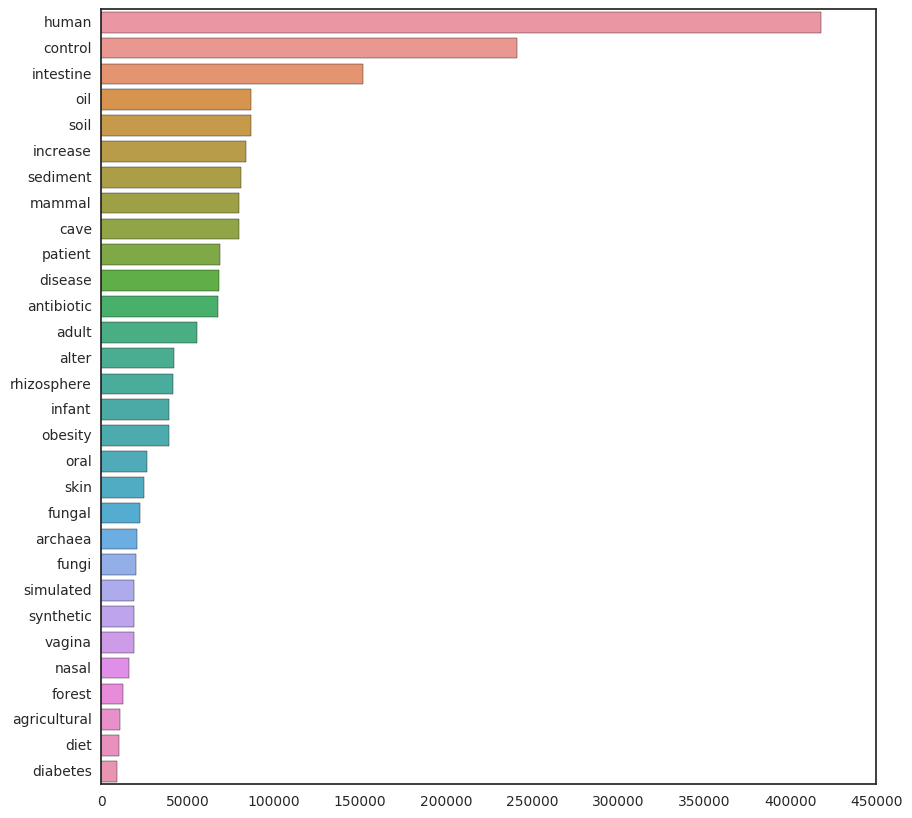

In [43]:
plt.figure(figsize=(10,10))
#p10 = sns.distplot(kw_bin)f, ax = plt.subplots(figsize=(7, 3))
p10 = sns.barplot(kw_bin[:30], kw_bin.index[:30])

In [ ]:
#intestine / healthy / diseased Venn diagram

In [ ]:
#create df with columns: intestine, disease, healthy
#    use is_in_keyword_group